In [1]:
from hydroDL import kPath

from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np

loading package hydroDL


In [5]:
results_path = '~/Downloads/best_metrics_all_runs.csv'
df = pd.read_csv(results_path)

In [10]:
df.sort_values("qual_obs_coefdet", ascending=False)[["date", "run_name", "qual_obs_coefdet"]].to_csv("temp.csv", index=False)

In [137]:
# Update this to filter for runs of interest
df = df[df.date == '2024-08-13']

In [4]:
df = df[df["train_obs_coefdet"] > 0]

,date,run_name,data_fold,training_method,rho,embedding_size,epochs,learning_rate,iterations_per_epoch,schedule_start_epoch,...,testing,fold,weights_path,device,dataset,split_version,seed,nh,iters_per_epoch,sched_start_epoch
1,2024-08-13,nadgrid_64_0.6_1,0.0,cherry_picking,45,64.0,500,0.01,20.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-13,modisgrid-new-const-STRAT_64_0.6_1,0.0,cherry_picking,45,64.0,500,0.01,20.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-13,modisgrid-new-const_64_0.6_0,0.0,cherry_picking,45,64.0,500,0.01,20.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-08-13,modisgrid-new-const-STRAT_64_0.6_0,0.0,cherry_picking,45,64.0,500,0.01,20.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-08-13,modisgrid-new-const_64_0.6_1,0.0,cherry_picking,45,64.0,500,0.01,20.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,modisgrid-new-const-strat_cherry_64_0.6_0.01_2,NaN,NaN,45,NaN,500,0.01,NaN,NaN,...,False,4.0,NaN,-1.0,singleDaily-modisgrid-new-const,stratified,2.0,64.0,20.0,200.0
204,NaN,modisgrid-new-const_cherry_64_0.6_0.01_2,NaN,NaN,45,NaN,500,0.01,NaN,NaN,...,False,2.0,NaN,-1.0,singleDaily-modisgrid-new-const,dataset,2.0,64.0,20.0,200.0
205,NaN,modisgrid-new-const_cherry_64_0.6_0.01_1,NaN,NaN,45,NaN,500,0.01,NaN,NaN,...,False,2.0,NaN,-1.0,singleDaily-modisgrid-new-const,dataset,1.0,64.0,20.0,200.0
206,NaN,modisgrid-new-const_cherry_64_0.6_0.01_0,NaN,NaN,45,NaN,500,0.01,NaN,NaN,...,False,1.0,NaN,-1.0,singleDaily-modisgrid-new-const,dataset,0.0,64.0,20.0,200.0


In [139]:
cols_to_keep = [
    "run_name", "mean_epoch_time", "mean_iteration_time", "mean_test_time", 
    "qual_obs_rmse", "qual_obs_corrcoef", "qual_obs_coefdet", "qual_site_rmse",
    "qual_site_corrcoef", "qual_site_coefdet", "qual_anomaly_rmse", "qual_anomaly_corrcoef",
    "qual_anomaly_coefdet", "poor_obs_rmse", "poor_obs_corrcoef", "poor_obs_coefdet",
    "poor_site_rmse", "poor_site_corrcoef", "poor_site_coefdet", "poor_anomaly_rmse",
    "poor_anomaly_corrcoef", "poor_anomaly_coefdet",  "train_obs_rmse",
    "train_obs_corrcoef", "train_obs_coefdet", "train_site_rmse", "train_site_corrcoef",
    "train_site_coefdet", "train_anomaly_rmse", "train_anomaly_corrcoef", "train_anomaly_coefdet"
]


In [140]:
df[cols_to_keep].groupby("run_name").agg(np.mean).sort_values("qual_obs_coefdet")[["qual_obs_coefdet", "train_obs_coefdet"]].sort_values("train_obs_coefdet", ascending=False)

/var/folders/_6/xq5r06kd7qb_g5546y0zvvz80000gn/T/ipykernel_89456/1353594128.py:1: FutureWarning: The provided callable <function mean at 0x121ce6200> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[cols_to_keep].groupby("run_name").agg(np.mean).sort_values("qual_obs_coefdet")[["qual_obs_coefdet", "train_obs_coefdet"]].sort_values("train_obs_coefdet", ascending=False)


,qual_obs_coefdet,train_obs_coefdet
run_name,,
nadgrid-STRAT_64_0.6_0,0.117652,0.781384
modisgrid-new-const-STRAT_64_0.6_0,0.239066,0.695556
modisgrid-new-const-STRAT_64_0.6_2,0.136275,0.683782
nadgrid-STRAT_64_0.6_1,0.121878,0.677758
modisgrid-new-const-STRAT_64_0.6_1,0.101149,0.677138
nadgrid-STRAT_64_0.6_2,0.116296,0.654382
modisgrid-new-const_64_0.6_1,0.576402,0.646089
nadgrid_64_0.6_2,0.565376,0.617035
nadgrid_64_0.6_1,0.523592,0.602663


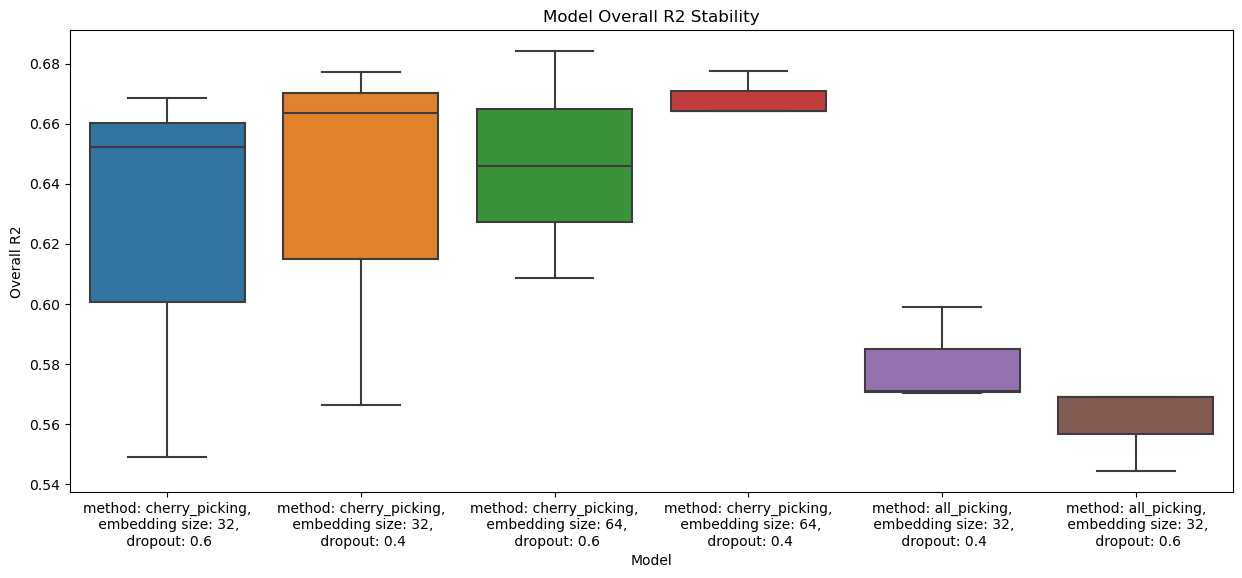

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='model', y='qual_obs_coefdet', data=df)
plt.xlabel('Model')
plt.ylabel('Overall R2')
plt.title('Model Overall R2 Stability')
plt.show()

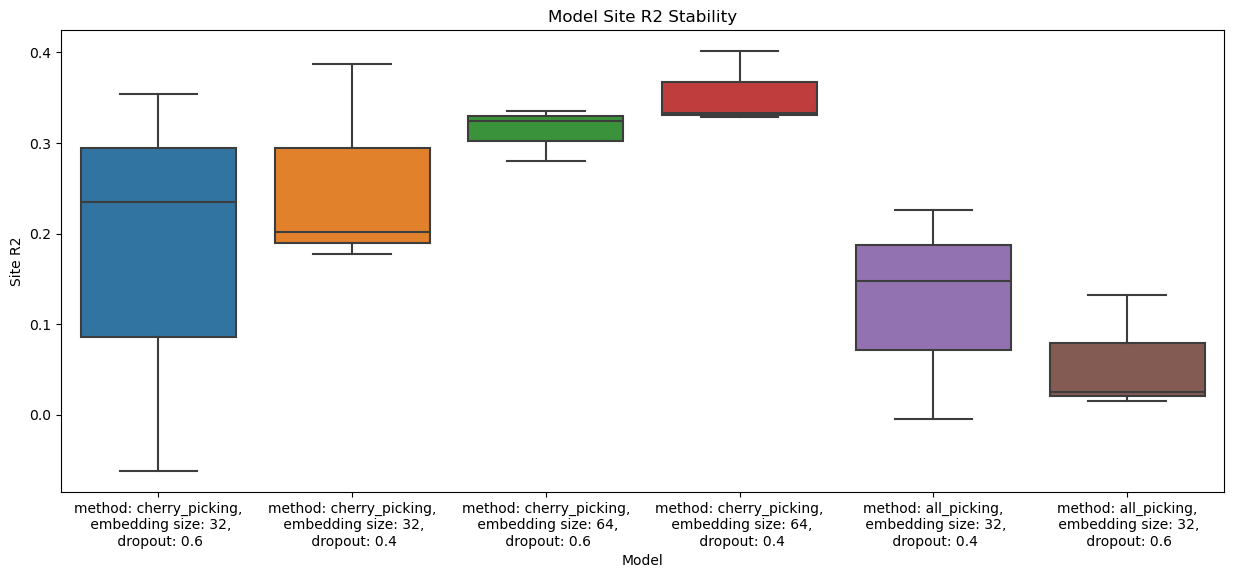

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='model', y='qual_site_coefdet', data=df)
plt.xlabel('Model')
plt.ylabel('Site R2')
plt.title('Model Site R2 Stability')
plt.show()

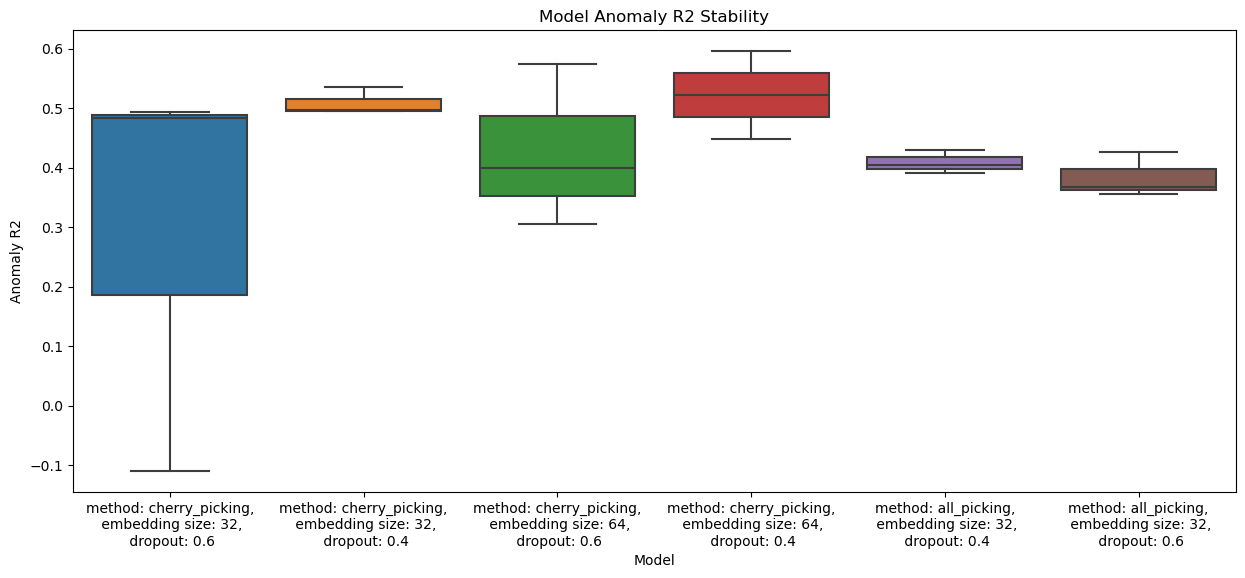

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='model', y='qual_anomaly_coefdet', data=df)
plt.xlabel('Model')
plt.ylabel('Anomaly R2')
plt.title('Model Anomaly R2 Stability')
plt.show()

In [4]:
df.sort_values('qual_obs_coefdet')[['run_name', 'qual_obs_coefdet', 'qual_obs_rmse', 'qual_site_coefdet', 'qual_site_rmse', 'qual_anomaly_coefdet', 'qual_anomaly_rmse']]

,run_name,qual_obs_coefdet,qual_obs_rmse,qual_site_coefdet,qual_site_rmse,qual_anomaly_coefdet,qual_anomaly_rmse
2,cherry_32_0.6_500,-0.014900,41.371060,-2.653493e+16,29.648049,-2.726950e+15,32.765426
16,all_32_0.4_1000,0.530548,28.137164,-1.601071e-01,23.522942,3.575960e-01,21.905609
7,cherry_64_0.4_1000,0.545401,27.688484,1.316589e-02,22.227116,-1.213441e-01,22.646140
15,all_32_0.6_1000,0.562059,27.176456,-8.152381e-04,23.028757,4.141844e-01,21.587633
17,all_32_0.2_1000,0.562952,27.148728,2.043936e-01,22.603097,4.153727e-01,22.061721
21,all_64_0.2_1000,0.565251,27.077226,1.016393e-01,22.342292,3.627257e-01,22.312036
5,cherry_64_0.6_500,0.566234,27.046615,5.466239e-02,23.184680,1.531912e-01,21.536766
10,cherry_64_0.2_500,0.582300,26.540990,1.264215e-01,21.638602,3.895617e-02,21.859895
19,all_64_0.6_500,0.583011,26.518387,4.430655e-02,21.919118,3.082614e-01,21.111564
13,all_32_0.6_500,0.589608,26.307797,1.778198e-01,22.166595,4.584997e-01,21.213393


In [38]:
df[['training_method', 'mean_epoch_time', 'mean_iteration_time', 'mean_test_time']].groupby('training_method').mean()

,mean_epoch_time,mean_iteration_time,mean_test_time
training_method,,,
all_picking,37.395685,1.767833,20.126205
cherry_picking,2.030158,0.095612,11.885740


In [9]:
new_df = new_df[(new_df.iloc[:, 17:] >= 0).all(axis=1)]

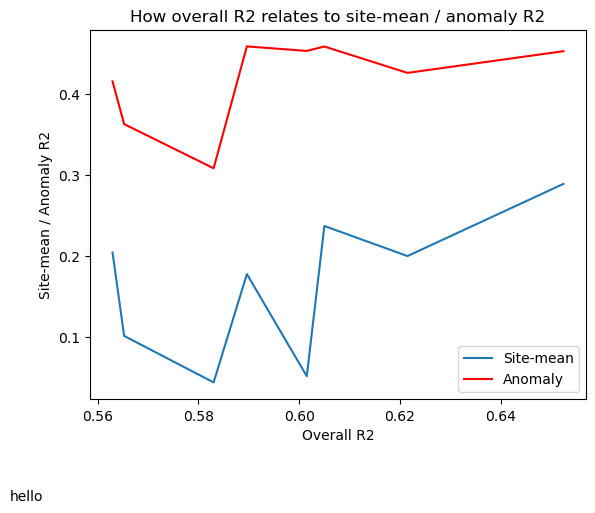

In [54]:
# VERSUS SITE
new_df = new_df.sort_values('qual_obs_coefdet')
plt.plot(new_df.qual_obs_coefdet, new_df.qual_site_coefdet)
# plt.scatter(new_df.qual_obs_coefdet, new_df.qual_site_coefdet)

plt.plot(new_df.qual_obs_coefdet, new_df.qual_anomaly_coefdet, c='red')
# plt.scatter(new_df.qual_obs_coefdet, new_df.qual_anomaly_coefdet, c='red')

plt.xlabel("Overall R2")
plt.ylabel("Site-mean / Anomaly R2")

plt.legend(["Site-mean", "Anomaly"])
plt.title("How overall R2 relates to site-mean / anomaly R2")
plt.figtext(0, -0.1, "Note: Here, all observations are from quality sites (>30 obs/site). Also, metrics are taken from epochs with ")

plt.show()

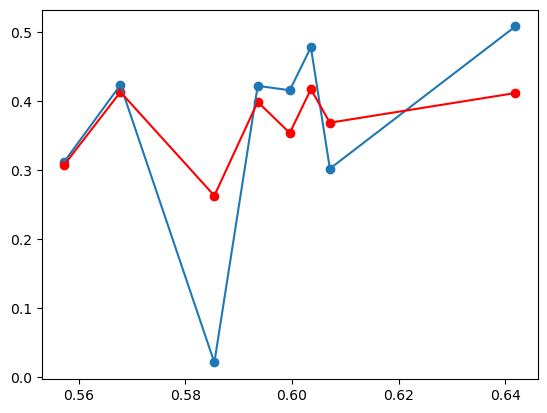

In [37]:
new_df = new_df.sort_values('poor_obs_coefdet')
plt.plot(new_df.poor_obs_coefdet, new_df.poor_site_coefdet)
plt.scatter(new_df.poor_obs_coefdet, new_df.poor_site_coefdet)

plt.plot(new_df.poor_obs_coefdet, new_df.poor_anomaly_coefdet, c='red')
plt.scatter(new_df.poor_obs_coefdet, new_df.poor_anomaly_coefdet, c='red')

plt.show()

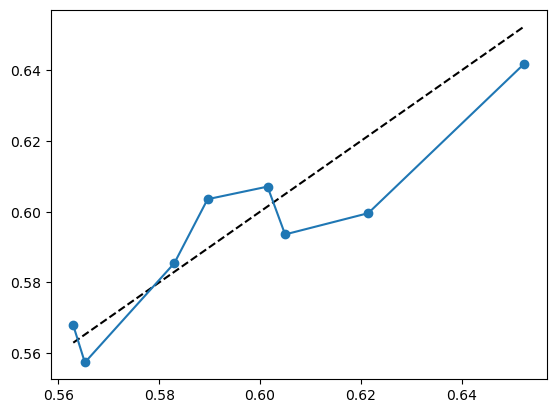

In [28]:
x = np.linspace(min(new_df.qual_obs_coefdet), max(new_df.qual_obs_coefdet))
plt.plot(x, x, label='x = y', linestyle='--', color='black')
plt.plot(new_df.qual_obs_coefdet, new_df.poor_obs_coefdet)
plt.scatter(new_df.qual_obs_coefdet, new_df.poor_obs_coefdet)
plt.show()

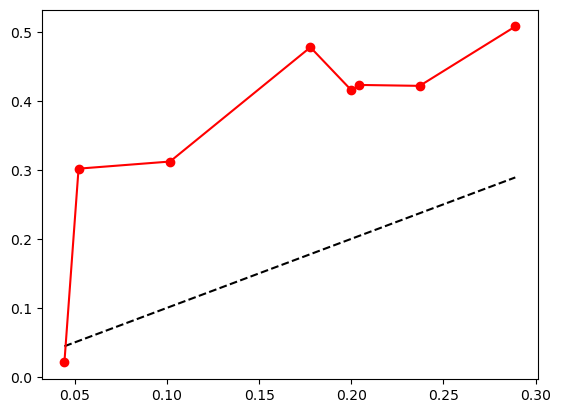

In [34]:
new_df = new_df.sort_values('qual_site_coefdet')
x = np.linspace(min(new_df.qual_site_coefdet), max(new_df.qual_site_coefdet))
plt.plot(x, x, label='x = y', linestyle='--', color='black')
plt.plot(new_df.qual_site_coefdet, new_df.poor_site_coefdet, color='red')
plt.scatter(new_df.qual_site_coefdet, new_df.poor_site_coefdet, color='red')

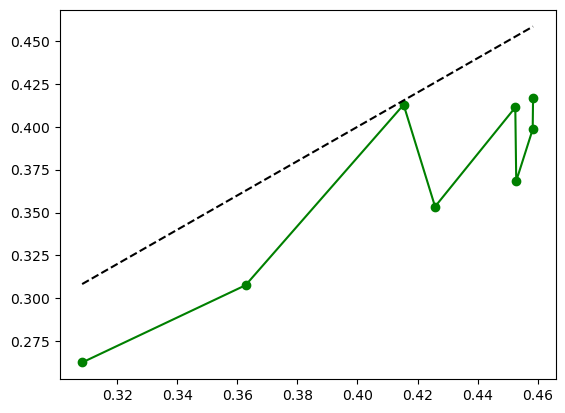

In [36]:
new_df = new_df.sort_values('qual_anomaly_coefdet')
x = np.linspace(min(new_df.qual_anomaly_coefdet), max(new_df.qual_anomaly_coefdet))
plt.plot(x, x, label='x = y', linestyle='--', color='black')
plt.plot(new_df.qual_anomaly_coefdet, new_df.poor_anomaly_coefdet, color='green')
plt.scatter(new_df.qual_anomaly_coefdet, new_df.poor_anomaly_coefdet, color='green')